In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("Train_df - Train_df.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             40 non-null     float64
 1   Temperature         30000 non-null  float64
 2   Rainfall_last_hour  30000 non-null  float64
 3   Snowfall_last_hour  30000 non-null  float64
 4   Cloud_Cover         30000 non-null  int64  
 5   Weather             30000 non-null  object 
 6   Weather_Desc        30000 non-null  object 
 7   TimeStamp           30000 non-null  object 
 8   Date                30000 non-null  object 
 9   Traffic_Vol         30000 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 2.3+ MB


In [4]:
df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02-10-2015 9:00,02-10-2015,7639.32
1,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 10:00,02-10-2015,6300.32
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 11:00,02-10-2015,6621.42
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 12:00,02-10-2015,6958.12
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 13:00,02-10-2015,6824.22


In [5]:
# Filter the rows where Holiday is 1
holiday_dates = df[df['Holiday'] == 1]['Date'].values

# Print all the dates where Holiday is 1
print(holiday_dates)
print(len(holiday_dates))

['08-10-2015' '12-11-2015' '22-11-2015' '25-12-2015' '01-01-2016'
 '18-02-2016' '27-05-2016' '04-07-2016' '22-08-2016' '02-09-2016'
 '14-10-2016' '11-11-2016' '28-11-2016' '25-12-2016' '01-01-2017'
 '20-01-2017' '17-02-2017' '26-05-2017' '03-07-2018' '27-08-2018'
 '07-09-2018' '12-10-2018' '11-11-2018' '26-11-2018' '25-12-2018'
 '01-01-2019' '15-02-2019' '30-05-2019' '04-07-2019' '25-08-2019'
 '05-09-2019' '10-10-2019' '11-11-2019' '24-11-2019' '26-12-2019'
 '02-01-2020' '16-01-2020' '20-02-2020' '29-05-2020' '04-07-2020']
40


In [6]:
# Filter the DataFrame to only include rows with the dates in holiday_dates
filtered_df = df[df['Date'].isin(holiday_dates)]

# Group by the 'Date' column and count the occurrences of each date
date_counts = filtered_df['Date'].value_counts()

# Print the result
print(date_counts)
print(filtered_df.count())

Date
08-10-2015    24
12-11-2015    24
22-11-2015    24
25-12-2015    24
01-01-2016    24
18-02-2016    24
27-05-2016    24
04-07-2016    24
22-08-2016    24
03-07-2018    24
26-05-2017    24
07-09-2018    24
27-08-2018    24
17-02-2017    24
20-02-2020    24
04-07-2020    24
11-11-2019    24
26-12-2019    24
02-01-2020    24
16-01-2020    24
29-05-2020    24
04-07-2019    24
05-09-2019    24
25-08-2019    24
11-11-2016    23
28-11-2016    23
10-10-2019    23
24-11-2019    22
01-01-2017    22
25-12-2016    22
12-10-2018    22
02-09-2016    22
30-05-2019    21
20-01-2017    21
15-02-2019    19
25-12-2018    19
01-01-2019    18
26-11-2018    14
11-11-2018    13
14-10-2016    12
Name: count, dtype: int64
Holiday                40
Temperature           892
Rainfall_last_hour    892
Snowfall_last_hour    892
Cloud_Cover           892
Weather               892
Weather_Desc          892
TimeStamp             892
Date                  892
Traffic_Vol           892
dtype: int64


In [7]:
# Update the 'Holiday' column to 1 for all rows where the 'Date' is in the holiday_dates list
df.loc[df['Date'].isin(holiday_dates), 'Holiday'] = 1

In [8]:
Holiday = df[df['Holiday'] == 1]
print(Holiday.count())

Holiday               892
Temperature           892
Rainfall_last_hour    892
Snowfall_last_hour    892
Cloud_Cover           892
Weather               892
Weather_Desc          892
TimeStamp             892
Date                  892
Traffic_Vol           892
dtype: int64


In [9]:
# Set 'Holiday' to 0 for all rows where 'Holiday' is not 1
df.loc[df['Holiday'] != 1, 'Holiday'] = 0

# Check the updated DataFrame
print(df.head())

   Holiday  Temperature  ...        Date  Traffic_Vol
0      0.0       289.28  ...  02-10-2015      7639.32
1      0.0       290.26  ...  02-10-2015      6300.32
2      0.0       290.28  ...  02-10-2015      6621.42
3      0.0       290.33  ...  02-10-2015      6958.12
4      0.0       292.14  ...  02-10-2015      6824.22

[5 rows x 10 columns]


In [10]:
Not_Holiday = df[df['Holiday'] == 0]
print(Not_Holiday.count())

Holiday               29108
Temperature           29108
Rainfall_last_hour    29108
Snowfall_last_hour    29108
Cloud_Cover           29108
Weather               29108
Weather_Desc          29108
TimeStamp             29108
Date                  29108
Traffic_Vol           29108
dtype: int64


In [11]:
df.head(20)

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02-10-2015 9:00,02-10-2015,7639.32
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 10:00,02-10-2015,6300.32
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 11:00,02-10-2015,6621.42
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 12:00,02-10-2015,6958.12
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 13:00,02-10-2015,6824.22
5,0.0,292.72,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 14:00,02-10-2015,7164.82
6,0.0,293.37,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 15:00,02-10-2015,7680.92
7,0.0,294.16,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 16:00,02-10-2015,8250.32
8,0.0,294.84,0.0,0.0,20,Cloudy skies,Scattered clouds,02-10-2015 17:00,02-10-2015,7952.62
9,0.0,293.70,0.0,0.0,20,Cloudy skies,Scattered clouds,02-10-2015 18:00,02-10-2015,6622.72


In [12]:
Weather = df['Weather'].unique()
print(Weather)
print(len(Weather))

['Cloudy skies' 'Clear skies' 'Rainfall' 'Light rain' 'Light fog'
 'Dense fog' 'Stormy weather' 'Airborne particles' 'Snowfall'
 'Sudden windstorm' 'Airborne smoke']
11


In [13]:
Weather_Desc = df['Weather_Desc'].unique()
print(Weather_Desc)
print(len(Weather_Desc))

['Partly cloudy skies' 'Fragmented clouds' 'Full cloud cover'
 'Clear skies' 'Scattered clouds' 'Soft rain' 'Mild drizzle' 'Fine fog'
 'Dense fog' 'Nearby rain showers' 'Steady rain' 'Light rain'
 'Intense rainfall' 'Approaching thunderstorm' 'Smoky air' 'Deep snow'
 'Storm with mild rain' 'Snowfall' 'Drizzle mixed with snow'
 'Gentle rain shower' 'Sudden windstorm'
 'Approaching thunderstorm with rain' 'Storm with rain'
 'Severe storm with heavy rain' 'Strong drizzle' 'Torrential downpour'
 'Storm with a light sprinkle' 'Stormy weather' 'Flurries'
 'Airborne smoke' 'Ice rain' 'Scattered snowflakes' 'Icy rain']
33


In [14]:
sum = 0
for condition in Weather:
    desc = df[df['Weather'] == condition]['Weather_Desc'].unique()
    print(condition, desc)
    print(len(desc))
    sum += len(desc)
print(sum)

Cloudy skies ['Partly cloudy skies' 'Fragmented clouds' 'Full cloud cover'
 'Scattered clouds']
4
Clear skies ['Clear skies']
1
Rainfall ['Soft rain' 'Nearby rain showers' 'Steady rain' 'Intense rainfall'
 'Gentle rain shower' 'Torrential downpour' 'Ice rain']
7
Light rain ['Mild drizzle' 'Light rain' 'Strong drizzle']
3
Light fog ['Fine fog']
1
Dense fog ['Dense fog']
1
Stormy weather ['Approaching thunderstorm' 'Storm with mild rain'
 'Approaching thunderstorm with rain' 'Storm with rain'
 'Severe storm with heavy rain' 'Storm with a light sprinkle'
 'Stormy weather']
7
Airborne particles ['Smoky air']
1
Snowfall ['Deep snow' 'Snowfall' 'Drizzle mixed with snow' 'Flurries'
 'Scattered snowflakes' 'Icy rain']
6
Sudden windstorm ['Sudden windstorm']
1
Airborne smoke ['Airborne smoke']
1
33


In [15]:
# Example: Merging Weather and Weather_Desc
df['Combined_Weather'] = df['Weather'] + " - " + df['Weather_Desc']
df.head(20)

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Combined_Weather
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02-10-2015 9:00,02-10-2015,7639.32,Cloudy skies - Partly cloudy skies
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 10:00,02-10-2015,6300.32,Cloudy skies - Fragmented clouds
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 11:00,02-10-2015,6621.42,Cloudy skies - Full cloud cover
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 12:00,02-10-2015,6958.12,Cloudy skies - Full cloud cover
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 13:00,02-10-2015,6824.22,Cloudy skies - Fragmented clouds
5,0.0,292.72,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 14:00,02-10-2015,7164.82,Clear skies - Clear skies
6,0.0,293.37,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 15:00,02-10-2015,7680.92,Clear skies - Clear skies
7,0.0,294.16,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 16:00,02-10-2015,8250.32,Clear skies - Clear skies
8,0.0,294.84,0.0,0.0,20,Cloudy skies,Scattered clouds,02-10-2015 17:00,02-10-2015,7952.62,Cloudy skies - Scattered clouds
9,0.0,293.70,0.0,0.0,20,Cloudy skies,Scattered clouds,02-10-2015 18:00,02-10-2015,6622.72,Cloudy skies - Scattered clouds


In [16]:
df = df.drop(['Weather', 'Weather_Desc'], axis=1)
df.head(20)

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,TimeStamp,Date,Traffic_Vol,Combined_Weather
0,0.0,289.28,0.0,0.0,40,02-10-2015 9:00,02-10-2015,7639.32,Cloudy skies - Partly cloudy skies
1,0.0,290.26,0.0,0.0,75,02-10-2015 10:00,02-10-2015,6300.32,Cloudy skies - Fragmented clouds
2,0.0,290.28,0.0,0.0,90,02-10-2015 11:00,02-10-2015,6621.42,Cloudy skies - Full cloud cover
3,0.0,290.33,0.0,0.0,90,02-10-2015 12:00,02-10-2015,6958.12,Cloudy skies - Full cloud cover
4,0.0,292.14,0.0,0.0,75,02-10-2015 13:00,02-10-2015,6824.22,Cloudy skies - Fragmented clouds
5,0.0,292.72,0.0,0.0,1,02-10-2015 14:00,02-10-2015,7164.82,Clear skies - Clear skies
6,0.0,293.37,0.0,0.0,1,02-10-2015 15:00,02-10-2015,7680.92,Clear skies - Clear skies
7,0.0,294.16,0.0,0.0,1,02-10-2015 16:00,02-10-2015,8250.32,Clear skies - Clear skies
8,0.0,294.84,0.0,0.0,20,02-10-2015 17:00,02-10-2015,7952.62,Cloudy skies - Scattered clouds
9,0.0,293.70,0.0,0.0,20,02-10-2015 18:00,02-10-2015,6622.72,Cloudy skies - Scattered clouds


In [17]:
# apply the label encoder to the 'Combined_Weather' column
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Combined_Weather'] = label.fit_transform(df['Combined_Weather'])
df.head(20)

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,TimeStamp,Date,Traffic_Vol,Combined_Weather
0,0.0,289.28,0.0,0.0,40,02-10-2015 9:00,02-10-2015,7639.32,5
1,0.0,290.26,0.0,0.0,75,02-10-2015 10:00,02-10-2015,6300.32,3
2,0.0,290.28,0.0,0.0,90,02-10-2015 11:00,02-10-2015,6621.42,4
3,0.0,290.33,0.0,0.0,90,02-10-2015 12:00,02-10-2015,6958.12,4
4,0.0,292.14,0.0,0.0,75,02-10-2015 13:00,02-10-2015,6824.22,3
5,0.0,292.72,0.0,0.0,1,02-10-2015 14:00,02-10-2015,7164.82,2
6,0.0,293.37,0.0,0.0,1,02-10-2015 15:00,02-10-2015,7680.92,2
7,0.0,294.16,0.0,0.0,1,02-10-2015 16:00,02-10-2015,8250.32,2
8,0.0,294.84,0.0,0.0,20,02-10-2015 17:00,02-10-2015,7952.62,6
9,0.0,293.70,0.0,0.0,20,02-10-2015 18:00,02-10-2015,6622.72,6


RMSE: 2520.497389
R2: 0.059282
MAE: 2149.611947


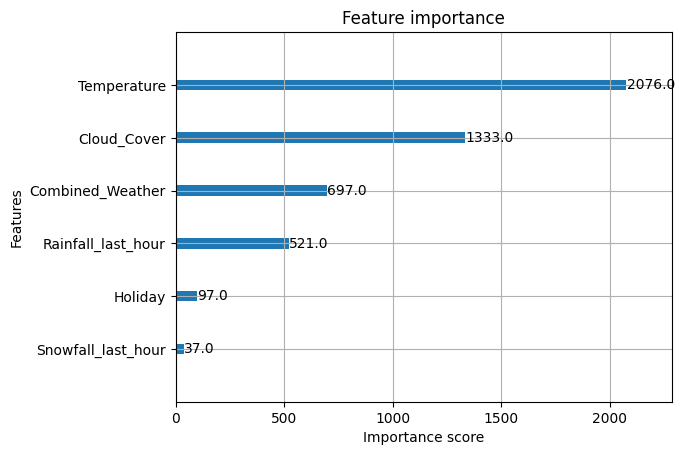

In [20]:
# apply the Xgboost algorithm to the dataset
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'Traffic_Volume' is your target variable
target = 'Traffic_Vol'

# Select only numeric columns for features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_columns].drop(target, axis=1) if target in numeric_columns else df[numeric_columns]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the XGBRegressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=123)
xgb_reg.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))
print("MAE: %f" % (mae))

# Plot the feature importances
xgb.plot_importance(xgb_reg)
plt.show()